# NYC Airbnb Time Series Analysis

## This script contain the following 
### 1. Importing Libraries and Data
### 2. Subsetting, Wrangling, and Cleaning Time-Series Data
### 3. Time-Series Ananlysis: Decomposition
### 4. Testing for Stationarity
### 5. Stationarizing The Exchange Rate of the Polish Zloty

## 1. Importing Libraries and Data

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import warnings

warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

In [2]:
#set path
path = r'/Users/shelbysteele/Documents/Airbnb NYC Rental Analysis'

In [3]:
#import data
df = pd.read_csv(os.path.join(path, '02 Data','Prepared Data', 'NYC_cleaned_data2.csv'))

In [4]:
#enable graphs apprear without calling them
%matplotlib inline

## 2. Subsetting, wrangling, and cleaning Time-Series Data

In [5]:
#checking df
df.shape

(81563, 22)

In [6]:
#checking columns
df.columns

Index(['Unnamed: 0', 'host_identity_verified', 'borough', 'neighborhood',
       'latitude', 'longitude', 'instant_bookable', 'cancellation_policy',
       'room_type', 'construction_year', 'price', 'service_fee',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'review_rate_number', 'listings_per_host',
       'Days booked', 'fee_category', 'revenue', 'construction_year '],
      dtype='object')

In [7]:
#drop Unnamed: 0 column
df.drop(columns = {'Unnamed: 0'}, inplace = True)

In [8]:
#Checking dataframe
df.head()

,host_identity_verified,borough,neighborhood,latitude,longitude,instant_bookable,cancellation_policy,room_type,construction_year,price,...,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,listings_per_host,Days booked,fee_category,revenue,construction_year
0,unconfirmed,Brooklyn,Kensington,40.64749,-73.97237,False,strict,Private room,2020,966.0,...,10.0,9,2021-10-19,0.21,4,6,286.0,High Fee,276276,2020.0
1,verified,Manhattan,Midtown,40.75362,-73.98377,False,moderate,Entire home/apt,2007,142.0,...,30.0,45,2022-05-21,0.38,4,2,228.0,Low Fee,32376,2007.0
2,verified,Manhattan,East Harlem,40.79851,-73.94399,False,moderate,Entire home/apt,2009,204.0,...,10.0,9,2018-11-19,0.10,3,1,289.0,Low Fee,58956,2009.0
3,verified,Manhattan,Murray Hill,40.74767,-73.97500,True,flexible,Entire home/apt,2013,577.0,...,3.0,74,2019-06-22,0.59,3,1,365.0,Medium Fee,210605,2013.0
4,unconfirmed,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,False,moderate,Private room,2009,1060.0,...,45.0,49,2017-10-05,0.40,5,1,219.0,High Fee,232140,2009.0


In [53]:
#grouping df by year and total bookings 
df2 = df.groupby('construction_year')['Days booked'].mean()

In [54]:
df2

construction_year
2003    140.843344
2004    143.061876
2005    143.255157
2006    143.581379
2007    142.033539
2008    145.978983
2009    137.956127
2010    145.083537
2011    146.186549
2012    143.551222
2013    138.948280
2014    141.372894
2015    142.998544
2016    137.045117
2017    142.174743
2018    138.918733
2019    140.803275
2020    141.988979
2021    138.759264
2022    142.602323
Name: Days booked, dtype: float64

In [55]:
#checking head
df2.head()

construction_year
2003    140.843344
2004    143.061876
2005    143.255157
2006    143.581379
2007    142.033539
Name: Days booked, dtype: float64

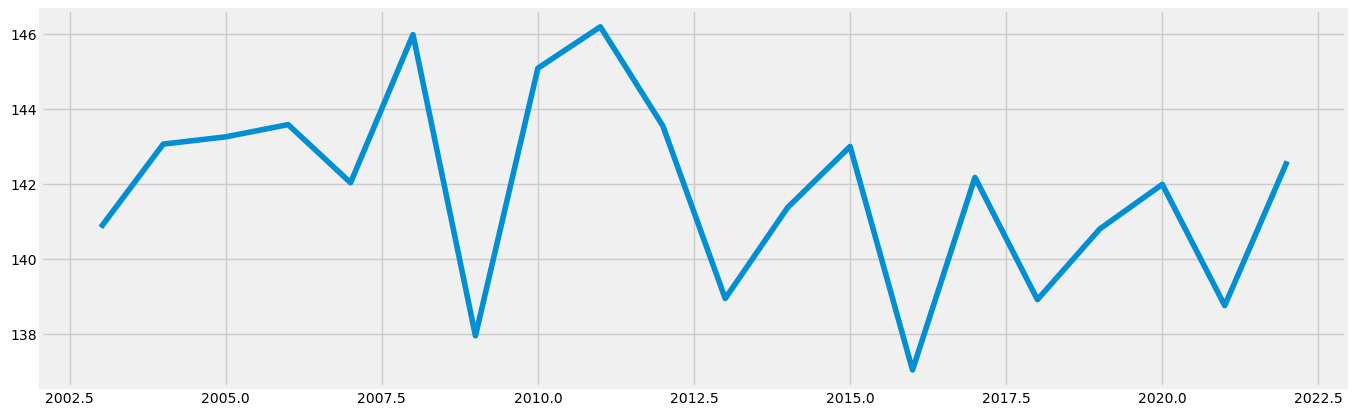

In [56]:
#Plot the data using matplotlib
plt.figure(figsize=(15,5), dpi=100) 
plt.plot(df2)

In [57]:
#check for missing values
df2.isnull().sum()

0

In [58]:
#check for duplicates
dups = df2.duplicated()
dups.sum()

0

## 3. Time-Series Analysis: Decomposition

In [59]:
#decompose the time series using an additive model
decomposition = sm.tsa.seasonal_decompose(df2, model='additive', period=1)

In [60]:
#importing rcParams to define a fixed size for the special chart. 
from pylab import rcParams
rcParams['figure.figsize'] = 18, 7

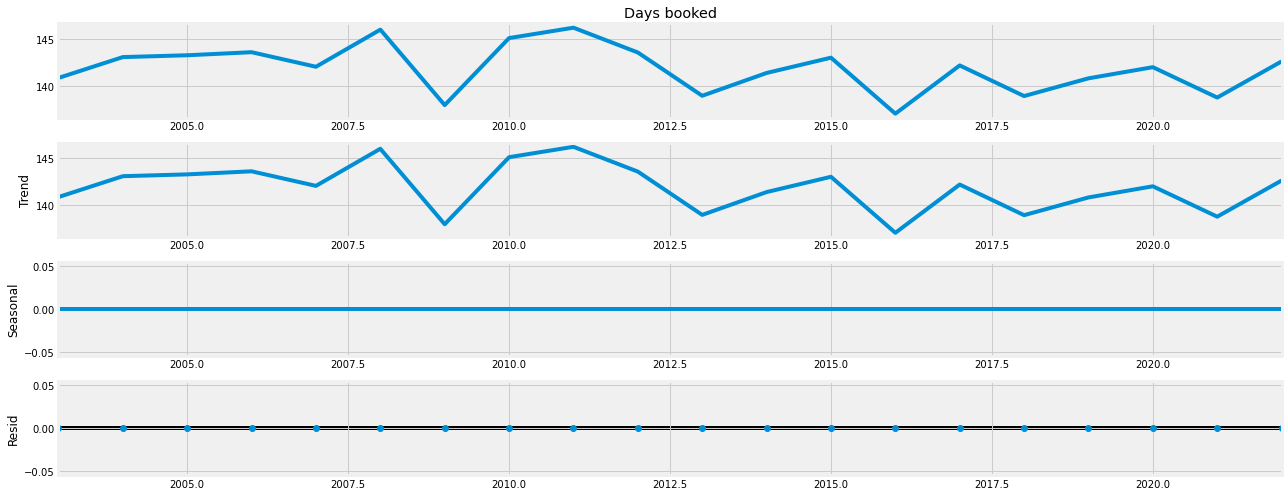

In [61]:
#plot the separate components
decomposition.plot()
plt.show()

The data doesnt follow any seasonal trends nor does it have any residual noise. The trend line follows the original data and appears to have a slight positive slope. 

## 4. Testing for Stationarity

In [62]:
#testing the dickey-fuller test
from statsmodels.tsa.stattools import adfuller 

def dickey_fuller(timeseries): 
    
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
        result['Critical Value (%s)'%key] = value
    print(result) 
    
dickey_fuller(df2)

Dickey-Fuller Stationarity test:
Test Statistic                 -4.672147
p-value                         0.000095
Number of Lags Used             0.000000
Number of Observations Used    19.000000
Critical Value (1%)            -3.832603
Critical Value (5%)            -3.031227
Critical Value (10%)           -2.655520
dtype: float64


TS = -4.672147
CV = -3.859072

The TS is smaller than the CV meaning that we can reject the null hypothesis and indicates that the data is stationary and has a p-value of <0.05. Below is the autocorrelation and its also supports that the data is stationary. 

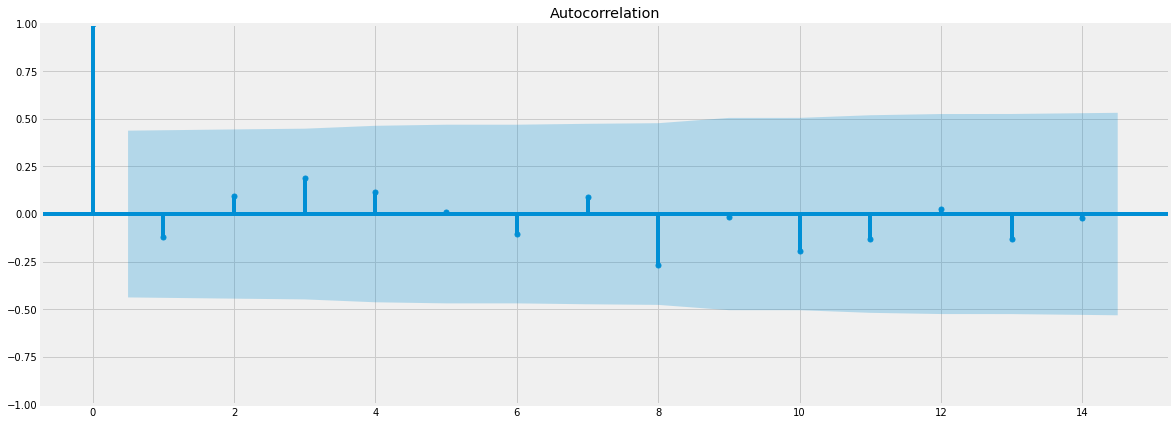

In [69]:
#check out a plot of autocorrelation
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
    
plot_acf(df2)
plt.show()